# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# citipy dependency
# pip install citipy

In [6]:
# Dependencies
import json
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import random
import datetime

from api_keys import weather_api_key, g_key
from scipy import stats
from citipy import citipy
from datetime import date
from scipy.stats import linregress

# Seeding
seed = random.seed(69)

# Date
today = date.today()

In [7]:
# citipy setup
cities = []

random.seed(69)
while len(cities) < 1500:
    # randomly selects lat and long
    random_lat = random.uniform(-90, 90)
    random_long = random.uniform(-180, 180)
    
    # add to the cities list
    city = citipy.nearest_city(random_lat, random_long)
    cities.append(city.city_name)

## Generate Cities List

In [8]:
# Dict for all cities
cities_dict = {
    "City": cities
}

# cities df
cities_df = pd.DataFrame(cities_dict)

# unique cities
unique_cities = cities_df["City"].unique()
unique_cities_df = pd.DataFrame(unique_cities)
num_unique_cities = len(unique_cities)
num_unique_cities

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# openweather url
units = "&units=imperial"
openweather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

present_city = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the weather api with each city on the list
for city in unique_cities:
    weather_response = requests.get(openweather_url + city + units).json()
    try:
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt']) # must append the city list at the end to avoid unwanted appends!
        present_city.append(city)
        print(f"{city} found!")
    # Missing cities are filtered out
    except KeyError: 
        print(f"{city} data missing :(")
        pass

kahului found!
port alfred found!
narrabri found!
fevralsk data missing :(
broome found!
panlaitan found!
saldanha found!
sao jose da coroa grande found!
caravelas found!
rikitea found!
mahebourg found!
lasa found!
datong found!
ushuaia found!
tazovskiy found!
avarua found!
vaini found!
castro found!
cape town found!
azovo found!
hasaki found!
saleaula data missing :(
le port found!
tuktoyaktuk found!
victoria found!
buenos aires found!
albany found!
yellowknife found!
cap malheureux found!
lida found!
fortuna found!
nador found!
new norfolk found!
tilichiki found!
yeppoon found!
nouadhibou found!
faanui found!
kunya found!
mahaicony data missing :(
bluff found!
talnakh found!
barrow found!
sentyabrskiy data missing :(
nikolskoye found!
kabare found!
funadhoo found!
busselton found!
kodiak found!
taolanaro data missing :(
berlevag found!
mushie found!
kapaa found!
nechi found!
butaritari found!
fene found!
nalut found!
iskateley found!
araripina found!
arraial do cabo found!
dikson fou

palu found!
gien found!
ayr found!
kanniyakumari found!
portland found!
vila franca do campo found!
storforshei found!
banjar found!
longlac data missing :(
barra do garcas found!
omboue found!
tumannyy data missing :(
san policarpo found!
muriwai beach found!
waingapu found!
santa isabel found!
tabiauea data missing :(
grootfontein found!
bonthe found!
bubaque found!
azare found!
mrirt data missing :(
sangar found!
ahvaz found!
pereslavl-zalesskiy found!
boromo found!
padang found!
galiwinku data missing :(
amahai found!
shellbrook found!
logrono found!
tevriz found!
pangnirtung found!
ejido found!
inhambane found!
ixtapa found!
lincoln found!
angoche found!
caucaia found!
la orilla found!
suksun found!
anyang found!
suzun found!
kachug found!
sao joao de pirabas found!
shieli found!
nchelenge found!
ust-labinsk found!
vaitupu data missing :(
dhidhdhoo found!
rio gallegos found!
tura found!
tongliao found!
bairiki found!
nizhyn found!
benalla found!
barbar data missing :(
gillette fou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
summary_df = pd.DataFrame({
    "City": present_city,
    "Lat": lat,
    "Lon": lon,
    "Max Temp (F)": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Save output data to this path
summary_df.to_csv(r'outputdata/cities_summary.csv')

# display the data
summary_df.head()

,City,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,kahului,20.8947,-156.4700,81.97,79,89,16.42,US,1626915795
1,port alfred,-33.5906,26.8910,48.96,80,95,32.59,ZA,1626915887
2,narrabri,-30.3167,149.7833,53.53,64,4,1.99,AU,1626916115
3,broome,42.2506,-75.8330,64.78,78,1,8.05,US,1626915853
4,panlaitan,12.1191,119.8486,82.83,82,94,24.07,PH,1626916116


In [11]:
summary_df.describe()

,Lat,Lon,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.151585,17.964909,69.615767,71.167549,54.610229,8.031746,1.626916e+09
std,32.926824,90.968871,13.860988,19.007581,42.574293,6.199266,2.155071e+02
min,-54.800000,-175.200000,33.300000,9.000000,0.000000,0.000000,1.626915e+09
25%,-3.942700,-63.069050,60.495000,63.000000,5.000000,3.440000,1.626916e+09
50%,24.093400,20.800000,71.260000,75.000000,67.000000,6.380000,1.626916e+09
75%,47.618400,100.259350,80.430000,85.000000,100.000000,11.070000,1.626916e+09
max,78.218600,179.316700,113.630000,100.000000,100.000000,53.370000,1.626916e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# There are no cities in df with humidity > 100%!

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

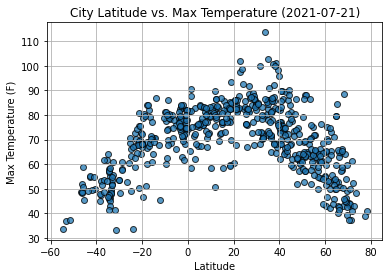

In [35]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 3], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("outputdata/Lat_vs_temp.png")

## Latitude vs. Humidity Plot

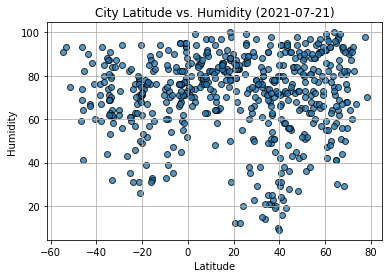

In [36]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 4], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Humidity ({today})")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("outputdata/Lat_vs_humidity.png")

## Latitude vs. Cloudiness Plot

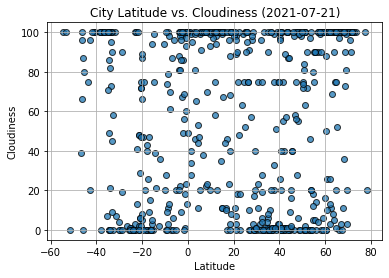

In [37]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 5], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("outputdata/Lat_vs_cloud.png")

## Latitude vs. Wind Speed Plot

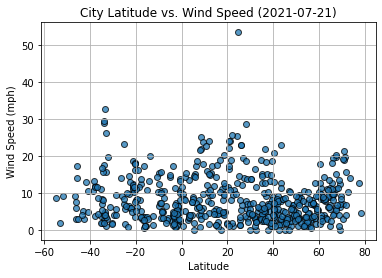

In [38]:
plt.scatter(summary_df.iloc[:, 1], summary_df.iloc[:, 6], edgecolors = "black", alpha = 0.75)
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("outputdata/Lat_vs_windspeed.png")

## Linear Regression

In [39]:
# Northern Hemisphere
# nh_df = grouped_hem_df.count()
nhem_df = summary_df.loc[summary_df["Lat"] >= 0]

# Southern Hemisphere
shem_df = summary_df.loc[summary_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6063735534330756


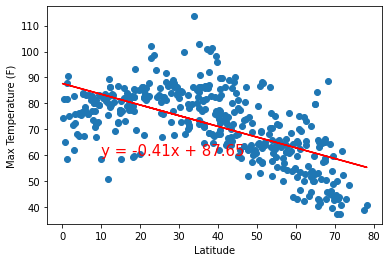

In [40]:
y = nhem_df.iloc[:, 3]
x = nhem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (10, 60), fontsize = 15, color = "red")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/NHem/NHem_temp_vs_lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7947469131956959


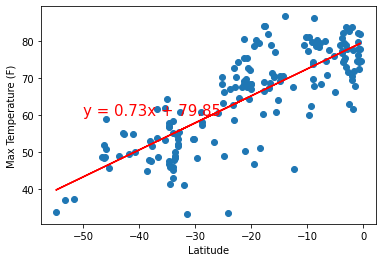

In [41]:
y = shem_df.iloc[:, 3]
x = shem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-50, 60), fontsize = 15, color = "red")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/SHem/SHem_temp_vs_lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.056941905348044455


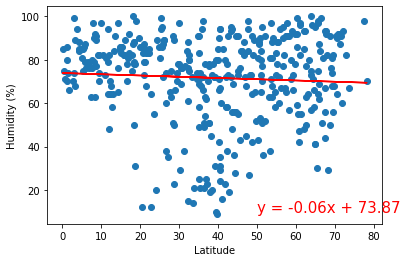

In [42]:
y = nhem_df.iloc[:, 4]
x = nhem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (50, 10), fontsize = 15, color = "red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/NHem/NHem_hum_vs_lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.007162510810938808


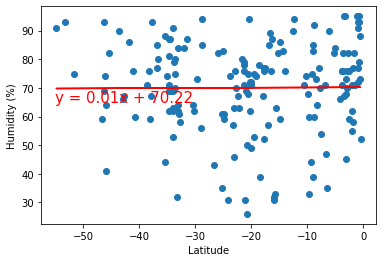

In [43]:
y = shem_df.iloc[:, 4]
x = shem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-55, 65), fontsize = 15, color = "red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/SHem/SHem_hum_vs_lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.020540396009171395


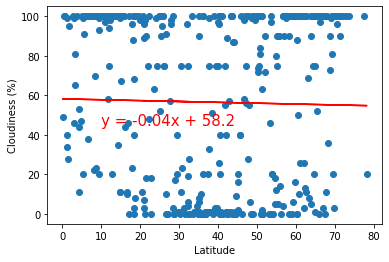

In [44]:
y = nhem_df.iloc[:, 5]
x = nhem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (10, 45), fontsize = 15, color = "red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/NHem/NHem_cloud_vs_lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.05348420177644864


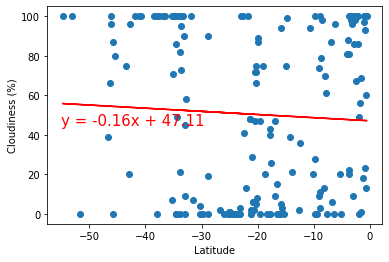

In [45]:
y = shem_df.iloc[:, 5]
x = shem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-55, 45), fontsize = 15, color = "red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/SHem/SHem_cloud_vs_lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12282277676571607


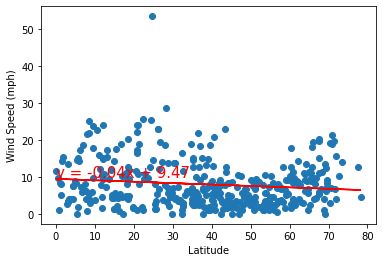

In [46]:
y = nhem_df.iloc[:, 6]
x = nhem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 10), fontsize = 15, color = "red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/NHem/NHem_wind_vs_lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1695272585692856


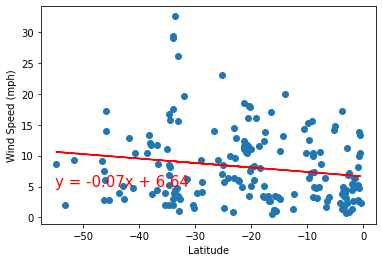

In [47]:
y = shem_df.iloc[:, 6]
x = shem_df.iloc[:, 1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-55, 5), fontsize = 15, color = "red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

print(f"The r-value is: {rvalue}")
plt.savefig("outputdata/SHem/SHem_wind_vs_lat.png")
plt.show()